In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk
import Augmentor

# Datos

In [19]:
# path = 'D:/Users/maryskal/Documents/SITK/CXR8/images/images_001'
path = '/home/mr1142/Documents/Data/segmentation'

In [20]:
masks_name = os.listdir(os.path.join(path, 'mascara'))

In [21]:
pixels = 256

In [22]:
def read_img(path, folder, img):
    img = cv2.imread(os.path.join(path, folder, img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (pixels, pixels))
    img = np.expand_dims(img, axis=-1)
    return img

In [23]:
def normalize(img):
    return (img - np.mean(img))/ np.std(img)

In [24]:
def binarize(img):
    img[img>0] = 1
    return img

In [25]:
def clahe(img):
    clahe = cv2.createCLAHE()
    final_img = np.expand_dims(clahe.apply(img), axis=-1)
    return final_img

In [26]:
masks = np.zeros((len(masks_name), pixels,pixels,1))
for i in range(len(masks_name)):
    masks[i, ...] = binarize(read_img(path, 'mascara', masks_name[i]))

In [27]:
images = np.zeros((len(masks_name), pixels,pixels,1))
for i in range(len(masks_name)):
    images[i, ...] = normalize(read_img(path, 'images', masks_name[i]))

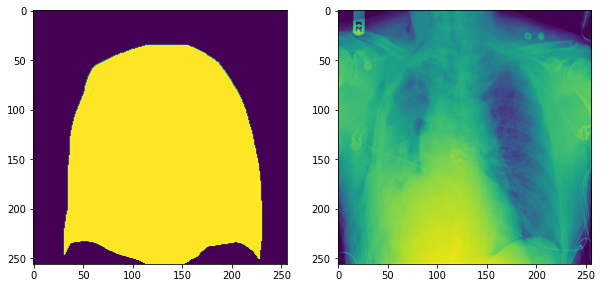

In [57]:
r = np.random.randint(0, len(images))
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(masks[r])
plt.subplot(1,2,2)
plt.imshow(images[r])
plt.show()

In [29]:
images.shape

(492, 256, 256, 1)

# Aumento de datos

In [108]:
import albumentations as A
import cv2

transform = A.Compose([
    A.Rotate(limit=60),
    A.RandomCrop(width=256, height=256),
    A.RandomBrightnessContrast(p=0.2)
])

/home/mr1142/miniconda3/envs/init/lib/python3.6/site-packages/albumentations/augmentations/transforms.py:1641: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  FutureWarning,


In [85]:
new = 100
new_mask = np.zeros((new, pixels,pixels,1))
new_images = np.zeros((new, pixels,pixels,1))

for i in range(new):
    r = np.random.randint(0, images.shape[0])
    transformed = transform(image= images[r,...].astype('float32'), masks=[masks[r,...].astype(np.uint32)])
    new_mask[i,...] = transformed['masks'][0]
    new_images[i,...] = transformed['image']

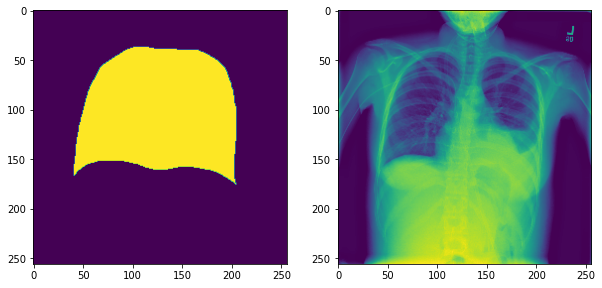

In [104]:
r = np.random.randint(0, len(new_images))
plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(new_mask[r])
plt.subplot(1,2,2)
plt.imshow(new_images[r])
plt.show()

In [64]:
np.unique(new_images[r])

array([0.0000e+00, 1.0000e+00, 6.5535e+04])